In [ ]:
# Import beberapa library
import math
import random
import matplotlib.pyplot as matplot

**Generate populasi**


fungsi yang membuat kromosom sepanjang chromosomeLength dan populasi sebanyak n dengan representasi biner dengan cara menggunakan metode random

In [ ]:
def generatePopulation(chromosomeLength, n):
    # Inisiasi variabel populasi
    population = []

    # Looping sebanyak n populasi 
    for i in range(n):
        # Inisiasi variabel kromosom
        chromosome = []
        
        # Loop sebanyak length dari kromosom 
        for j in range(chromosomeLength):
            # Random nilai biner antara 1 dan 0 untuk melakukan pengisian nilai kromosom
            chromosome.append(random.randint(0,1))

        # Memasukkan nilai kromosom ke dalam populasi
        population.append(chromosome)

    # Mengembalikan nilai populasi yang berisikan n kromosom
    return population

**PROSES DEKODE KROMOSOM**

proses dekode kromosom mejadi 2 bagian yaitu x dan y.

In [ ]:
def chromosomeDecode(chromosome, intervalX, intervalY):
    half_chromosome = len(chromosome)//2

    #menghitung bagian kiri genotype
    left_x = 0
    chromosome_x = chromosome[:half_chromosome]
    for i in range (1, half_chromosome+1):
        left_x += chromosome_x[i-1] * (2**-i)
    
    #menghitung bagian kanan genotype
    right_y = 0
    chromosome_y = chromosome[half_chromosome:]
    for i in range (1, half_chromosome+1):
        right_y += chromosome_y[i-1] * (2**-i)

    
    sum_bot = sum([2 ** -(i) for i in range (1, half_chromosome + 1)])

    #rumus menghitung genotype
    x = intervalX["min"] + (left_x * (intervalX["max"] - intervalX["min"]) / sum_bot)
    y = intervalY["min"] + (right_y * (intervalY["max"] - intervalY["min"]) / sum_bot)

    return x,y

**Fitness function**

fungsi mendapatkan nilai yang menunjukkan kualitas solusi (minimasi).

In [ ]:
def fitnessFunction(x, y):
    # mengembalikkan nilai dari fungsi yang ada pada soal
    f = (math.cos(x) + math.sin(y))/(pow(x,2) + pow(y,2))
    return (1/(f+0.1))

#domain(batas nilai) interval dari soal
intervalX = {"min" : -5, "max" : 5}
intervalY = {"min" : -5, "max" : 5}

**PROSES PEMILIHAN ORANG TUA**

Seleksi 2 buah kromosom untuk dijadikan parent menggunakan Roulette Wheel Selection

In [ ]:
def twoParentSelection(population, fitnessPopulation):
    # Inisiasi variable temporary
    temp = 0

    for chromosome in range(len(population)):
        temp += fitnessPopulation[chromosome]

    rng = random.random()

    chromosome = 0
    while rng > 0 :
        rng -= fitnessPopulation[chromosome] / temp
        chromosome += 1
    
    return chromosome - 1

In [ ]:
def parentSelection(population):
    n = len(population)

    fitnessPopulation = []
    for chromosome in range(n):
        x, y = chromosomeDecode(population[chromosome], intervalX, intervalY)
        fitnessPopulation.append(fitnessFunction(x, y))

    # Normalisasi nilai fitness
    min_ = min(fitnessPopulation)
    max_ = max(fitnessPopulation)

    for i in range(n):
        fitnessPopulation[i] = (fitnessPopulation[i] - min_) / (max_ - min_)

    # Melakukan Roulette Wheel untuk mendapatkan 2 parent
    parent = []

    while len(parent) != 2:
        chromosome = twoParentSelection(population, fitnessPopulation)
        parent.append(population[chromosome])

    return parent

**PROSES CROSSOVER (PINDAH SILANG)**

Proses untuk mencocokkan sub-solusi orang tua yang baik untuk menciptakan keturunan yang lebih baik.

In [ ]:
def singlePointCrossover(parent):
    chromosomeLength = len(parent[0])

    intersectionPoint = random.randint(0, chromosomeLength)
    child = [0, 0]
    child[0] = parent[0][:intersectionPoint] + parent[1][intersectionPoint:]
    child[1] = parent[1][:intersectionPoint] + parent[0][intersectionPoint:]

    return child

**PROSES MUTASI KROMOSOM**

Untuk mensimulasikan efek kesalahan yang terjadi dengan probabilitas yang rendah selama proses duplikasi.


In [ ]:
def chromosomeMutation(child, probability):
    chromosomeLength = len(child[0])

    for i in range(2):
        for j in range(chromosomeLength):
          if probability >= random.random():
            child[i][j] = [0, 1][not child[i][j]]

    return child

**MAIN PROGRAM**

In [ ]:
bestGeneration = []
crossoverProbability = 0.6
mutationProbability = 0.05
populationSize = 20
chromosomeSize = 10
elitismSize = 2
generationSize = 20
population = generatePopulation(chromosomeSize, populationSize)

print(f"Population Size         : {populationSize}")
print(f"Chromosome Size         : {chromosomeSize}")
print(f"Generation Size         : {generationSize}")
print(f"Elitism Size            : {elitismSize}")
print(f"Crossover Probability   : {crossoverProbability}")
print(f"Mutation Probability    : {mutationProbability}")

print("================================== Main ====================================")

for i in range(generationSize):
    fitnessPopulation = []

    for chromosome in population:
        x,y = chromosomeDecode(chromosome, intervalX, intervalY)
        fitnessPopulation.append(fitnessFunction(x, y))

    bestGeneration.append(max(fitnessPopulation))

    sortedPopulation = [m for _, m in sorted(zip(fitnessPopulation, population), reverse=True)]


    newPopulation = sortedPopulation[:elitismSize]

    
    print(f"x = {x}, y = {y}")
    print(f"Generasi {i + 1},  Best fitness: {bestGeneration[i]}")
    print("-------------------------------------------------")


    while len(newPopulation) != populationSize:

        parent = parentSelection(population)

        if crossoverProbability > random.random() :
            child = chromosomeMutation(singlePointCrossover(parent), mutationProbability)
        else:
            child = parent + []

        newPopulation = newPopulation + child

    population = newPopulation + []

Population Size         : 20
Chromosome Size         : 10
Generation Size         : 20
Elitism Size            : 2
Crossover Probability   : 0.6
Mutation Probability    : 0.05
================================== Main ====================================
x = -0.16129032258064502, y = -4.67741935483871
Generasi 1,  Best fitness: 28.84655628971235
-------------------------------------------------
x = 4.67741935483871, y = 1.451612903225806
Generasi 2,  Best fitness: 28.84655628971235
-------------------------------------------------
x = -2.4193548387096775, y = -4.032258064516129
Generasi 3,  Best fitness: 28.84655628971235
-------------------------------------------------
x = 2.741935483870968, y = 4.67741935483871
Generasi 4,  Best fitness: 28.84655628971235
-------------------------------------------------
x = 0.48387096774193505, y = 3.387096774193548
Generasi 5,  Best fitness: 32.355498523293726
-------------------------------------------------
x = 2.741935483870968, y = 4.67741935483

**Grafik pertumbuhan fitness function terbaik**

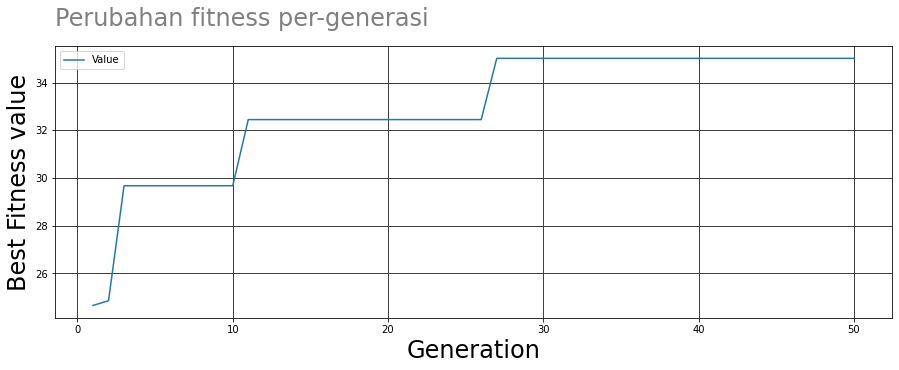

In [ ]:
matplot.figure(figsize=(15, 5))

matplot.plot(range(1, generationSize + 1), bestGeneration)
matplot.title("Perubahan fitness per-generasi", loc='left', pad=20, fontsize=24, color='grey')
matplot.xlabel("Generation", fontsize = 24)
matplot.ylabel("Best Fitness value", fontsize=24)
matplot.grid(linestyle="-", linewidth=1, color='.25')
matplot.legend(['Value'], loc='upper left')
matplot.show()